In [198]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn.tree import _tree
from IPython.display import Image 
from sklearn.externals.six import StringIO 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [202]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    features = ','.join(feature_names)
    print(f"def tree({features}):")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [2]:
df = pd.read_csv("/home/oscar/Downloads/OnlineNewsPopularity.csv")

In [4]:
df.columns = [x.strip() for x in df.columns]

In [163]:
df["success"] = (df["shares"] > df["shares"].quantile(.9))*1

In [206]:
ls_cont = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
           'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
           'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
           'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
           'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
           'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
           'abs_title_subjectivity', 'abs_title_sentiment_polarity']
target = "shares"
target_disc = "success"

In [207]:
X = df[ls_cont]
yr = df[target]
yc = df[target_disc]

In [209]:
X.shape

(39644, 44)

### Árbol regresor

In [208]:
DecisionTreeRegressor?

In [210]:
arb = DecisionTreeRegressor(min_samples_leaf=0.03)

In [211]:
arb.fit(X, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.03,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [213]:
ls_res = cross_val_score(estimator = arb, X=X, y=yr, cv=4, n_jobs=-1, scoring="r2")

In [214]:
np.mean(ls_res), np.std(ls_res)

(0.014270711146300269, 0.005134672792898417)

### Árbol clasificador 

In [215]:
arb = DecisionTreeClassifier(min_samples_leaf=0.03)

In [216]:
arb.fit(X, yc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [217]:
ls_res = cross_val_score(estimator = arb, X=X, y=yc, cv=4, n_jobs=-1, scoring="roc_auc")

In [218]:
np.mean(ls_res), np.std(ls_res)

(0.6807465541365818, 0.023223409521909783)

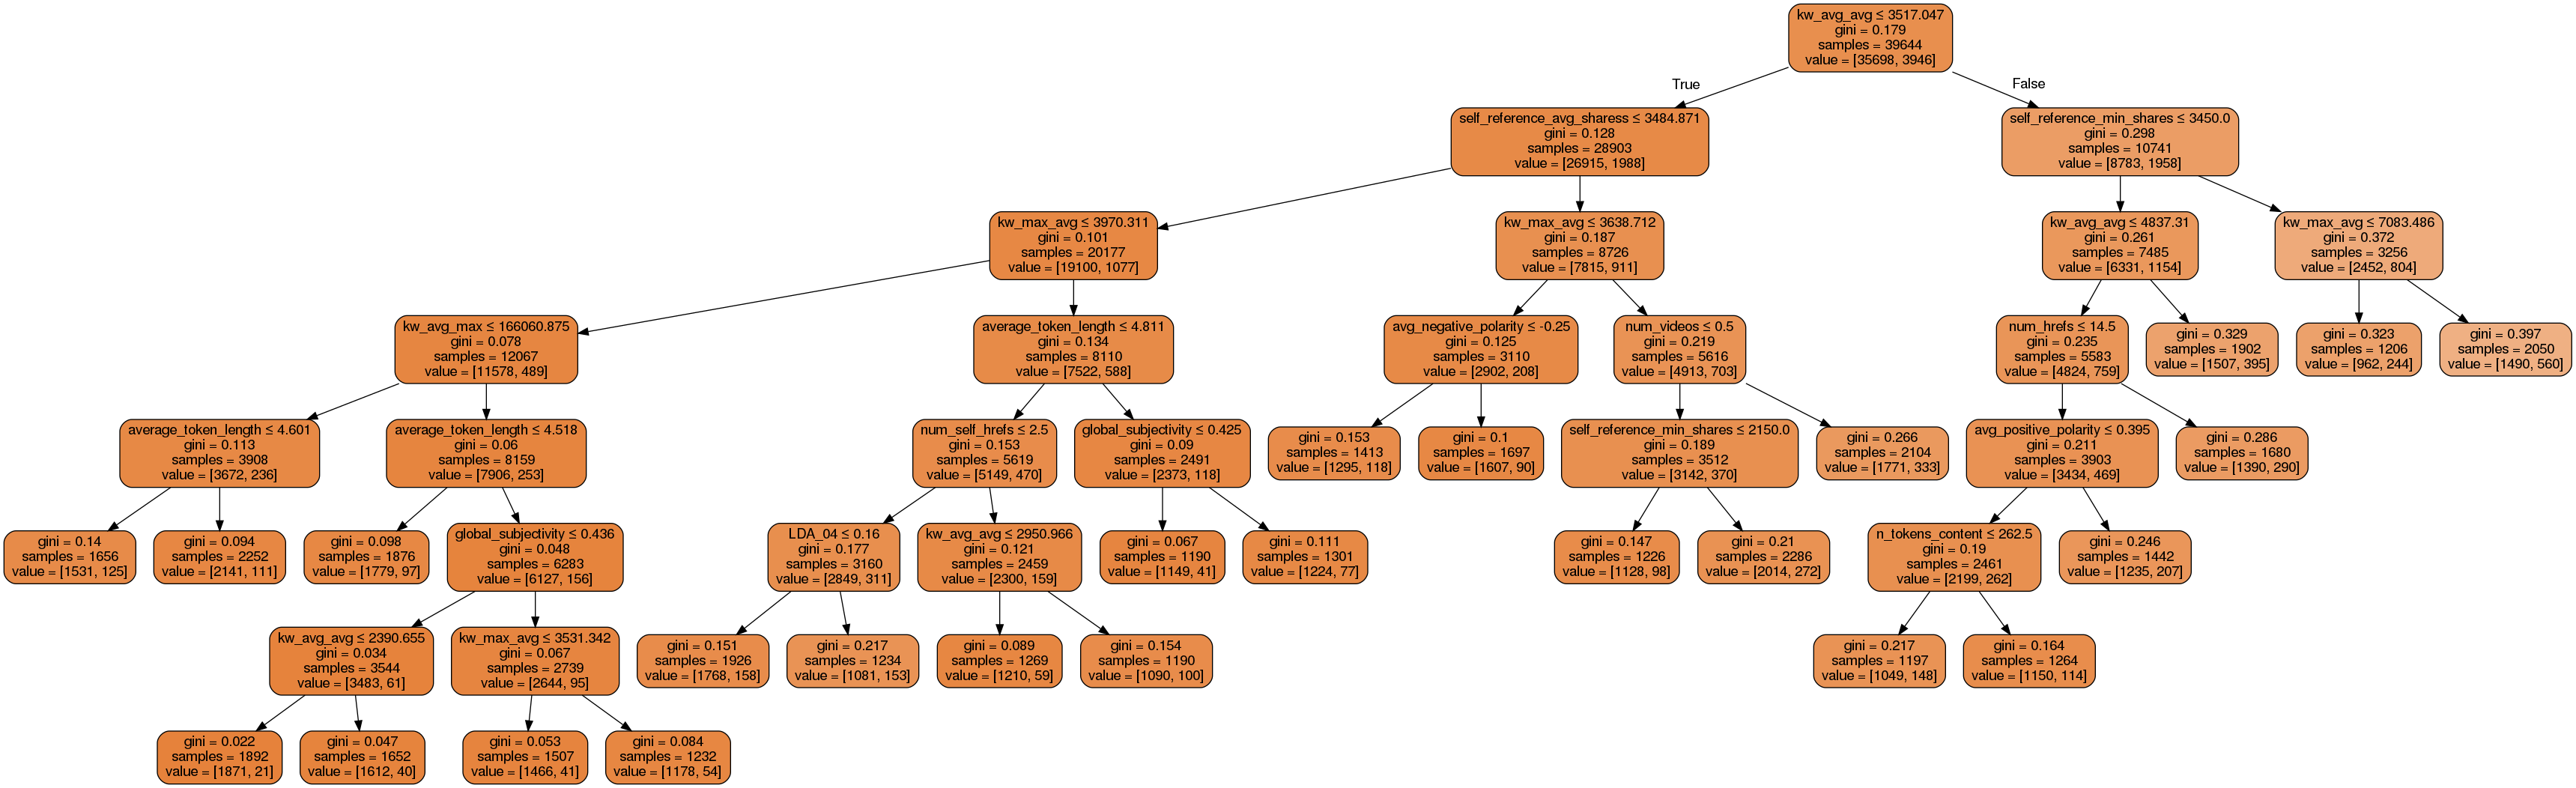

In [219]:
dot_data = StringIO()
export_graphviz(arb, out_file=dot_data, feature_names=ls_cont,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [204]:
print(tree_to_code(feature_names=ls_cont, tree=arb))

def tree(n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity):
  if kw_avg_avg <= 3517.0467529296875:
    if self_reference_avg_sharess <= 3484.8714599609375:
      if kw_max_avg <= 3970.3114013671875:
        if kw_avg_max <= 166060.875:
          if average_token_length <= 4.600745677947998:
       